## Network data

### Uploading networks 
We load networks from csv files with edges and nodes. Thanks to Lisa for inspiration and data from https://github.com/lhehnke/openscience-publications/blob/master/data/nodes_countries.csv

Processed 67 lines.
Processed 468 lines.


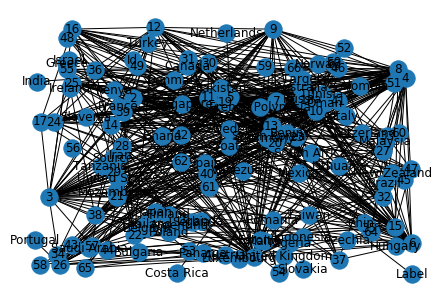

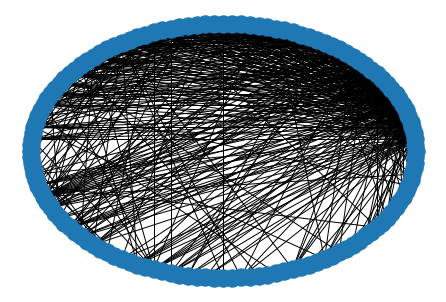

In [2]:
#Read networks from file 

import networkx as nx 
import csv
import matplotlib.pyplot as plt

G = nx.Graph() # create an empty graph


with open('nodes_countries.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        G.add_node(row[0])#add edge to the graph #print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
        line_count += 1
        G.add_edge(row[0],row[1])
        G.add_edge(row[1],row[0])
        #nx.draw(G, with_labels = True)
    print(f'Processed {line_count} lines.')



with open('edges_countries.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        G.add_edge(row[0], row[1])#add edge to the graph #print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
        #find attribute number in array of nodes
        #plot name of that node
        line_count += 1
    print(f'Processed {line_count} lines.')


'''
TODO: better visualisation when nodes are grouped in communities 
Also, labels should be readable
'''    
    
#draw different layouts    
nx.draw_random(G,with_labels = True)
plt.show()
nx.draw_circular(G)
#plt.show()
#nx.draw_spectral(G)
plt.show()
    
#draw graph with labels 

    

### Analyzing graphs

The networks are quite messy and full of links, therefore we perform some simple network analysis on them.
The structure of G can be analyzed using various graph-theoretic functions such as: linear ones (degree), non-linear ones (betweenness etc.)


In [5]:
import numpy as np


def measures_for_network(G):
    # -*- coding: utf-8 -*-
    """
    Created on Tue Jul 23 11:33:37 2019
    
    @author: lyubo
    """
    
    print('drawing measures for graph')
    plt.hist(list(nx.degree_centrality(G).values()))
    plt.xlabel('normalized degree') #np.max(nx.degree_centrality(G_roads).values())*
    plt.ylabel('frequency')
    plt.show()
    
    
    
    plt.hist(list(nx.betweenness_centrality(G).values()))
    plt.xlabel('betweenness')
    plt.ylabel('frequency')
    plt.show()
    
    
    
    plt.hist(list(nx.clustering(G).values()))
    plt.xlabel('clustering')
    plt.ylabel('frequency')
    plt.show()
    
    
    
    plt.hist(list(nx.closeness_centrality(G).values()))
    plt.xlabel('closeness')
    plt.ylabel('frequency')
    plt.show()
    
    print('calculating global measures')
    
    print('average neighbor degree', nx.average_degree_connectivity(G))
    
    print('average neighbor degree', nx.average_neighbor_degree(G))
    
    print('average clustering')
    avclus = nx.average_clustering(G)
    print(avclus)
    
    
    
    components = nx.connected_components(G)
    print('components', components)
    #[[1, 2, 3], ['spam']]
    
    
    nx.clustering(G)
    #{1: 0.0, 2: 0.0, 3: 0.0, 'spam': 0.0}
    
    
    nx.degree(G)
    #Functions that return node properties return dictionaries keyed by node label. {1: 2, 2: 1, 3: 1, 'spam': 0}



data loaded
network created from adjacency matrix
5006
3353


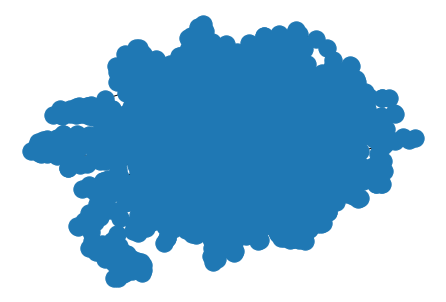

calculating network measures for a network...
drawing measures for graph


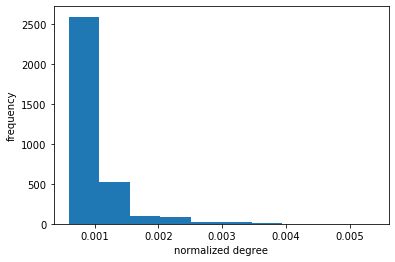

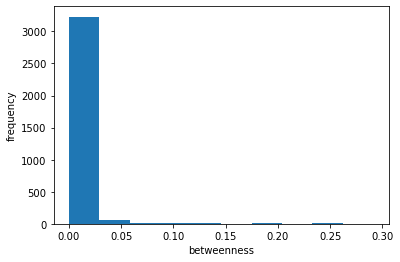

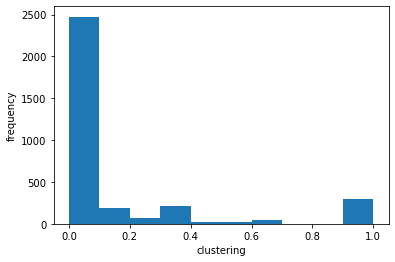

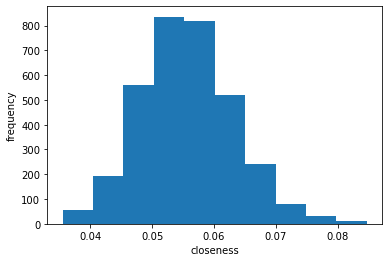

calculating global measures
average neighbor degree {4: 3.659365558912387, 2: 3.751379690949227, 5: 3.854639175257732, 3: 3.7084933845497225, 6: 3.9081632653061225, 7: 4.154285714285714, 8: 4.064285714285714, 9: 4.527777777777778, 10: 4.59375, 11: 5.6767676767676765, 12: 3.2222222222222223, 18: 3.5555555555555554, 13: 3.5, 14: 7.071428571428571}
average neighbor degree {0: 2.0, 1: 2.5, 2: 2.8, 3: 4.0, 4: 4.5, 5: 2.6666666666666665, 6: 2.3333333333333335, 7: 2.5, 8: 2.0, 9: 3.5, 10: 2.5, 11: 3.0, 12: 3.0, 13: 4.666666666666667, 14: 2.0, 15: 2.5, 16: 5.0, 17: 2.5, 18: 3.0, 19: 3.5, 20: 3.2, 21: 4.0, 22: 2.0, 23: 2.6, 24: 4.666666666666667, 25: 4.0, 26: 4.0, 27: 2.6666666666666665, 28: 2.0, 29: 4.333333333333333, 30: 2.3333333333333335, 31: 3.3333333333333335, 32: 2.0, 33: 2.0, 34: 3.5, 35: 3.2, 36: 6.5, 37: 2.75, 38: 3.0, 39: 4.0, 40: 3.5, 41: 4.0, 42: 4.666666666666667, 43: 3.8333333333333335, 44: 5.0, 45: 2.5, 46: 3.0, 47: 2.6666666666666665, 48: 4.0, 49: 2.5, 50: 3.6666666666666665, 5

In [6]:
## We can also read networks from txt adjacency matrix 

#Read networks from file 

import networkx as nx 
import csv
import matplotlib.pyplot as plt
import numpy as np

adj_matix = np.loadtxt('C:/Users/lyubo/Documents/DATA_networks/otherNetworks/adj_matrix/adj_matrixpowergrid.txt', delimiter = ',')
print('data loaded')

Graph = nx.from_numpy_matrix(adj_matix)
print('network created from adjacency matrix')

#Greg1 = nx.random_geometric_graph(20, 0.1)
#Greg2 = nx.random_regular_graph(3, 100)

print(Graph.number_of_edges())
print(Graph.number_of_nodes())

nx.draw(Graph)
plt.show()

print('calculating network measures for a network...')
measures_for_network(Graph)

print('fitting power law for degree sequence for scale-free network')


